
# USED CARS DATA


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Manipulation

In [2]:
car_sales=pd.read_csv('Car_sales_transactions.csv')
city_master=pd.read_excel('City_Master.xlsx')
city_master.drop(['State_Code'],axis=1,inplace=True)
car_sales=car_sales.merge(city_master,on='City_Code',how='left')
print(car_sales.head())

   Sales_ID                          Name  Year  Selling_Price  km_Driven  \
0         1        Maruti Swift Dzire VDI  2014         450000     145500   
1         2  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2         3      Honda City 2017-2020 EXi  2006         158000     140000   
3         4     Hyundai i20 Sportz Diesel  2010         225000     127000   
4         5        Maruti Swift VXI BSIII  2007         130000     120000   

  City_Code State_Code  Postal_Code    Fuel Seller_Type Transmission  \
0      CT01       ST15       400001  Diesel  Individual       Manual   
1      CT28       ST11       834001  Diesel  Individual       Manual   
2      CT12       ST28       201301  Petrol  Individual       Manual   
3      CT21       ST27       248001  Diesel  Individual       Manual   
4      CT03       ST24       600020  Petrol  Individual       Manual   

          Owner     Mileage   Engine   Max_Power  Seats City_Name  
0   First Owner   23.4 kmpl  1248 CC

## - Imported csv and excel file
## - Added missing 'City_Name' column by using merged on common field 'City_Code'

In [3]:
car_sales.shape

(7906, 17)

In [4]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales_ID       7906 non-null   int64 
 1   Name           7906 non-null   object
 2   Year           7906 non-null   int64 
 3   Selling_Price  7906 non-null   int64 
 4   km_Driven      7906 non-null   int64 
 5   City_Code      7906 non-null   object
 6   State_Code     7906 non-null   object
 7   Postal_Code    7906 non-null   int64 
 8   Fuel           7906 non-null   object
 9   Seller_Type    7906 non-null   object
 10  Transmission   7906 non-null   object
 11  Owner          7906 non-null   object
 12  Mileage        7906 non-null   object
 13  Engine         7906 non-null   object
 14  Max_Power      7906 non-null   object
 15  Seats          7906 non-null   int64 
 16  City_Name      7906 non-null   object
dtypes: int64(6), object(11)
memory usage: 1.1+ MB


In [5]:
car_sales.describe()

,Sales_ID,Year,Selling_Price,km_Driven,Postal_Code,Seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,503562.180116,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,204939.677172,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,110001.000000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,391510.000000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,524225.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,680001.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,834001.000000,14.000000


## -Generated some basic information about car_sales DataFrame like shape, Column Names

In [6]:
print(car_sales.Fuel.unique())
print(car_sales.Transmission.unique())
print(car_sales.Seller_Type.unique())
print(car_sales.Owner.unique())
print(car_sales.City_Name.unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Manual' 'Automatic']
['Individual' 'Dealer' 'Trustmark Dealer']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
['Mumbai' 'Ranchi' 'Noida' 'Dehradun' 'Chennai' 'Jaipur' 'Pune'
 'Aurangabad' 'Bangalore' 'Nellore' 'Coimbatore' 'kanpur' 'Gangtok'
 'Kochi' 'Vadodara' 'Delhi' 'Mysore' 'Ludhiana' 'Indore' 'Jamshedpur'
 'Kolkata' 'Hyderabad' 'Patna' 'Thrissur' 'Surat' 'Vellore' 'Bhubaneshwar'
 'Ahmedabad' 'Mangalore']


## Checked unique values in some columns to see any discrepancy in data. This can also help in identifying spelling mistakes.

In [7]:
Brand_Name=pd.Series(map(lambda x:x.split(' ')[0],car_sales['Name']))
car_sales.insert(2,"Brand_Name",Brand_Name)

Car_Name=car_sales['Name'].apply(lambda x:x.replace(x.split()[0],''))
car_sales.insert(3,"Car_Name",Car_Name)

## - 'Name' Column had two information, first was brand name and other was name of the car.
## -To get better analysis we splitted 'Name' Column into two different columns namely 'Brand_Name' and 'Car_Name' 


In [8]:
Mileage1=pd.Series(map(lambda x:x.split(' ')[0],car_sales['Mileage']))
car_sales.insert(15,"Mileage1",Mileage1)

In [9]:
Engine1=pd.Series(map(lambda x:x.split(' ')[0],car_sales['Engine']))
car_sales.insert(17,"Engine1",Engine1)

In [10]:
MaxPower=pd.Series(map(lambda x:x.split(' ')[0],car_sales['Max_Power']))
car_sales.insert(17,"MaxPower",MaxPower)

## -Mileage, Engine and Max_Power were stored as a string in our DataFrame because they had units along with them, Example -Mileage was stored as 25 km/ltr.
## -To perform analysis we needed only numerical data not the units.
## -We Removed the all units from those columns

In [11]:
car_sales.drop(['Name'],axis=1,inplace=True)
car_sales.drop(['Mileage'],axis=1,inplace=True)
car_sales.drop(['Engine'],axis=1,inplace=True)
car_sales.drop(['Max_Power'],axis=1,inplace=True)

## -Dropping duplicate and unnecessary columns from DataFrame

In [12]:
car_sales.rename(columns={'Engine1':'Engine','Mileage1':'Mileage','MaxPower':'Max_Power'},inplace=True)
car_sales.head()

,Sales_ID,Brand_Name,Car_Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Max_Power,Engine,Seats,City_Name
0,1,Maruti,Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,Manual,First Owner,23.4,74,1248,5,Mumbai
1,2,Skoda,Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,Manual,Second Owner,21.14,103.52,1498,5,Ranchi
2,3,Honda,City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,Manual,Third Owner,17.7,78,1497,5,Noida
3,4,Hyundai,i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,Manual,First Owner,23.0,90,1396,5,Dehradun
4,5,Maruti,Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,Manual,First Owner,16.1,88.2,1298,5,Chennai


## -Renaming modified columns to their default names

In [13]:
car_sales['Mileage']=car_sales['Mileage'].astype(float)
car_sales['Engine']=car_sales['Engine'].astype(float)
car_sales['Max_Power']=car_sales['Max_Power'].astype(float)
print(type(car_sales['Mileage'][0]),type(car_sales['Engine'][0]),type(car_sales['Max_Power'][0]))

<class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.float64'>


## -Changed datatypes of 'Mileage','Engine' and 'Max_Power'
## -Verfied the same


# a)Which variables are significant in predicting the price of a used car?


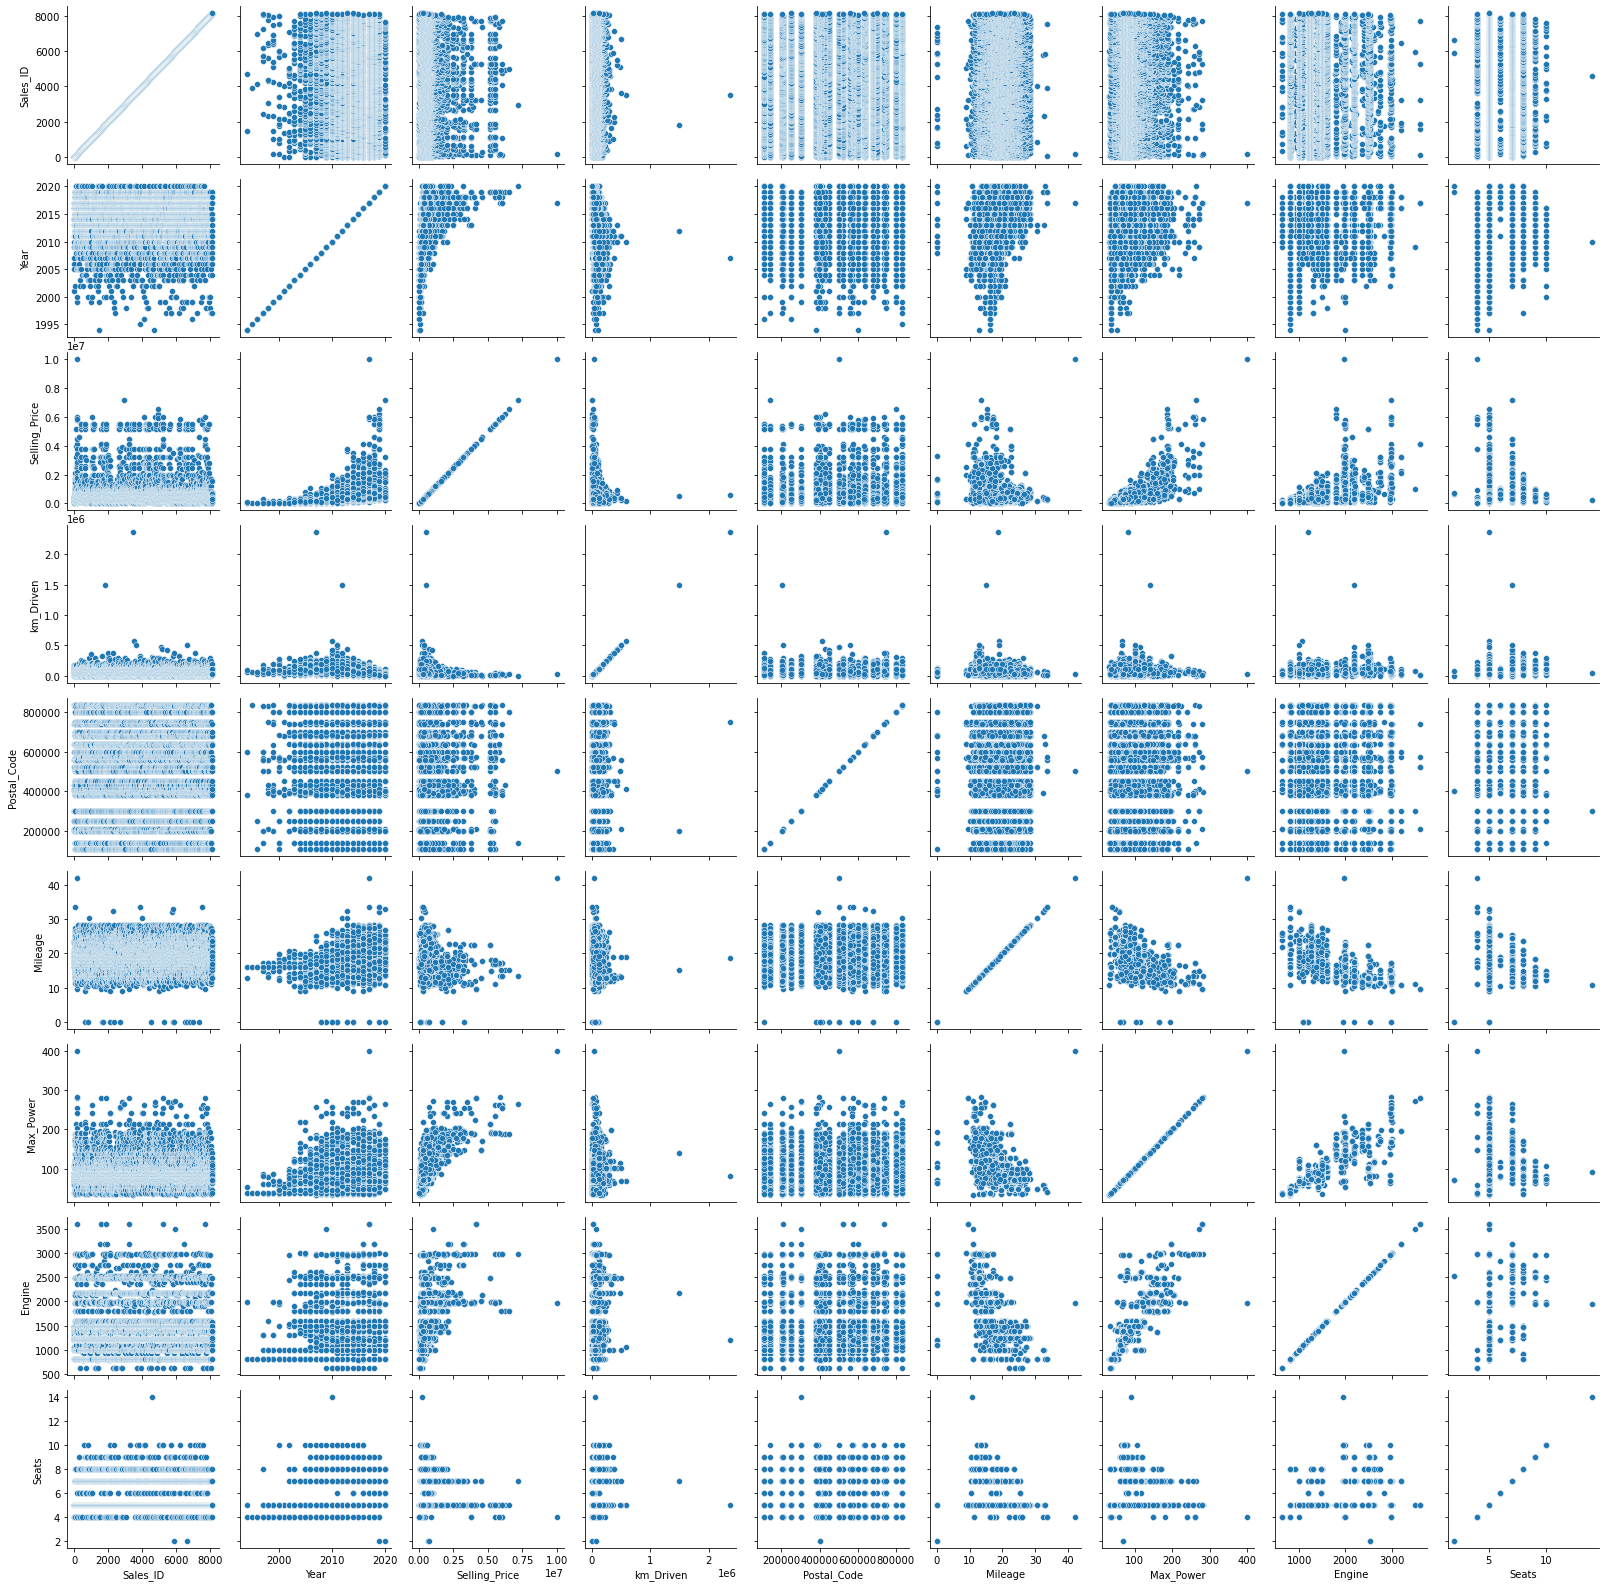

In [14]:
g=sns.PairGrid(car_sales)
x=g.map(sns.scatterplot)

## Inferences:
## -Used sns library to plot all scatter plots
## -Used scatter plot to find coorelation between Selling Price and other Columns
## -'Selling Price' and 'Year' seems to have positive correlaton
## -'Selling Price' and 'Max_Power' seems to have positive correlaton
## -'Selling Price' and 'Engine' seems to have positive correlaton
## -'Selling Price' and 'km_Driven' seems to have negative correlaton

#  b)How well those variables describe the price of a car

In [15]:
np.corrcoef(car_sales['Mileage'], car_sales['Selling_Price'])[0, 1]

-0.12627994951355354

In [16]:
np.corrcoef(car_sales['Year'], car_sales['Selling_Price'])[0, 1]

0.4123015581711673

In [17]:
np.corrcoef(car_sales['Max_Power'], car_sales['Selling_Price'])[0, 1]

0.7496737800444895

In [18]:
np.corrcoef(car_sales['Engine'], car_sales['Selling_Price'])[0, 1]

0.45568180003561526

In [19]:
np.corrcoef(car_sales['km_Driven'], car_sales['Selling_Price'])[0, 1]

-0.22215847533483793

## Inferences:
## -Calculated correlation coefficient for identified relationships.
## -'Selling Price' and 'Max_Power' have strong positive correlation
## -'Selling Price' and 'Engine' have medium positive correlation
## -'Selling Price' and 'Year' have medium positive correlation
## -'Selling Price' and 'km_Driven' have weak negative correlation


# c.	Which brands are selling most?

<AxesSubplot:xlabel='count', ylabel='Brand_Name'>

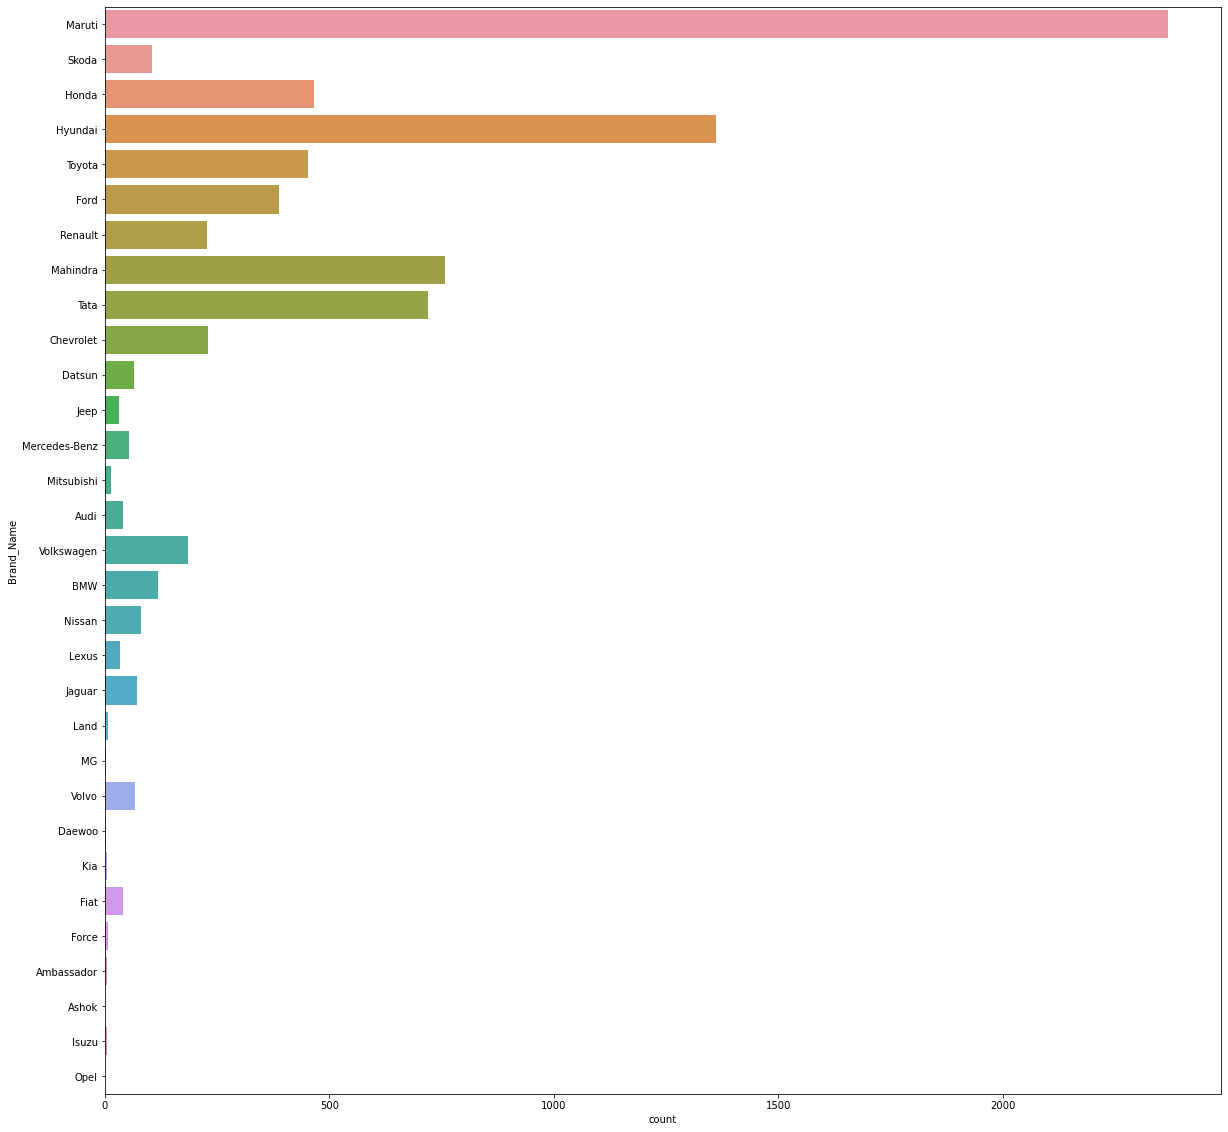

In [20]:
plt.figure(figsize=(20, 20))
sns.countplot(data=car_sales,y='Brand_Name')

In [21]:
brand_count=car_sales.groupby(['Brand_Name'])['Brand_Name'].count()
print(brand_count.sort_values(ascending = False).head(5))

Brand_Name
Maruti      2367
Hyundai     1360
Mahindra     758
Tata         719
Honda        466
Name: Brand_Name, dtype: int64


## - Maruti, Hyundai, Mahindra, Tata, Honda are most selling brands

# d.	Are there specific locations selling more?

<AxesSubplot:xlabel='count', ylabel='City_Name'>

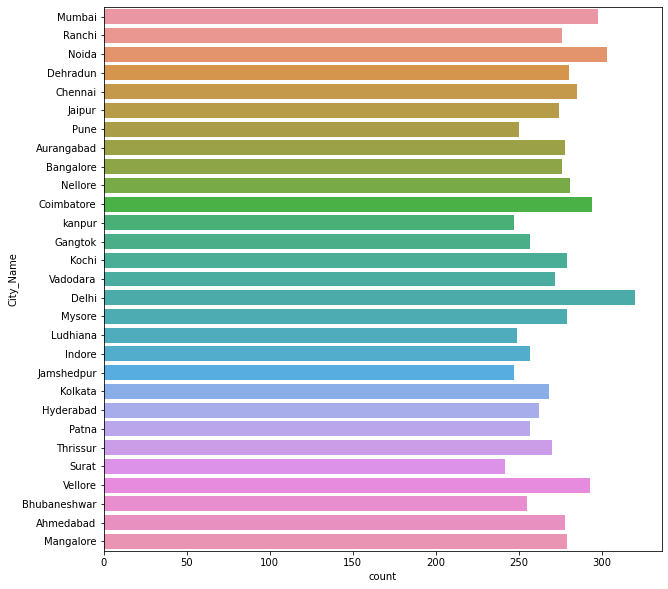

In [22]:
plt.figure(figsize=(10, 10))
sns.countplot(data=car_sales,y='City_Name')

## -Used sns to plot histogram
## -Delhi is selling most cars

In [23]:
location_count=car_sales.groupby(['City_Name'])['City_Name'].count()
print(location_count.sort_values(ascending = False).head(5))

City_Name
Delhi         320
Noida         303
Mumbai        298
Coimbatore    294
Vellore       293
Name: City_Name, dtype: int64


## - Top five selling locations are Delhi, Noida, Mumbai, Coimbatore, Vellore

# e) Which factors are more important in deciding cars' selling price?

<Figure size 2160x720 with 0 Axes>

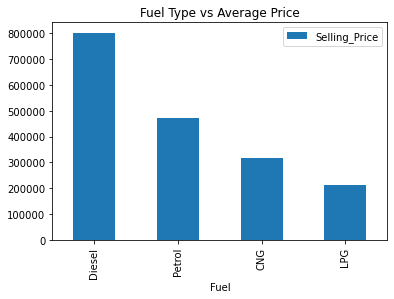

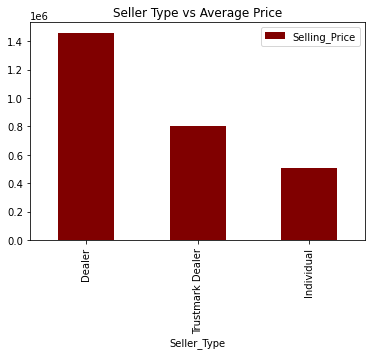

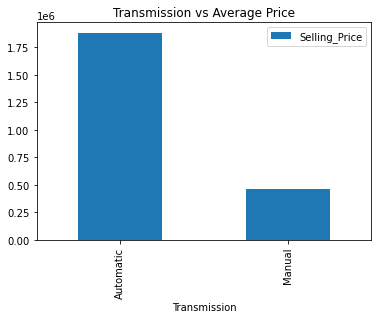

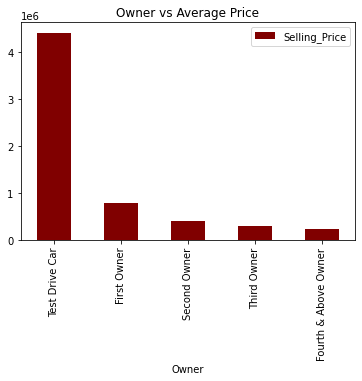

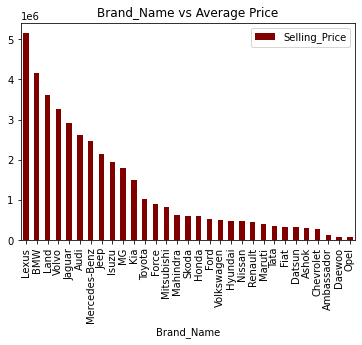

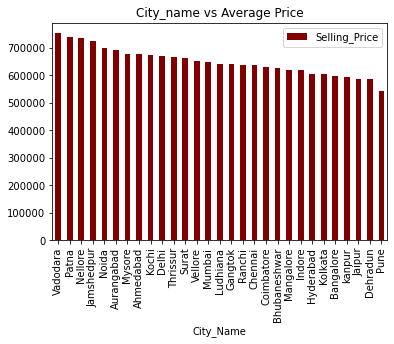

In [24]:
plt.figure(figsize=(30, 10))
df = pd.DataFrame(car_sales.groupby(['Fuel'])['Selling_Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(car_sales.groupby(['Seller_Type'])['Selling_Price'].mean().sort_values(ascending = False))
df.plot.bar(color ='maroon')
plt.title('Seller Type vs Average Price')
plt.show()

df = pd.DataFrame(car_sales.groupby(['Transmission'])['Selling_Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Transmission vs Average Price')
plt.show()

df = pd.DataFrame(car_sales.groupby(['Owner'])['Selling_Price'].mean().sort_values(ascending = False))
df.plot.bar(color ='maroon')
plt.title('Owner vs Average Price')
plt.show()

df = pd.DataFrame(car_sales.groupby(['Brand_Name'])['Selling_Price'].mean().sort_values(ascending = False))
df.plot.bar(color ='maroon')
plt.title('Brand_Name vs Average Price')
plt.show()

df = pd.DataFrame(car_sales.groupby(['City_Name'])['Selling_Price'].mean().sort_values(ascending = False))
df.plot.bar(color ='maroon')
plt.title('City_name vs Average Price')
plt.show()

## -Plotted Average price against 'Fuel Type', 'Seller_Type', 'Transmission' and 'Owner' for further analysis using matplotlib library.
## -After Analysing 'Fuel Type', 'Seller_Type', 'Transmission'  'Owner', 'Max_Power' , 'Year', 'Engine', 'km_Driven' are important factors in deciding 'Selling_Price'

# Further Analysis

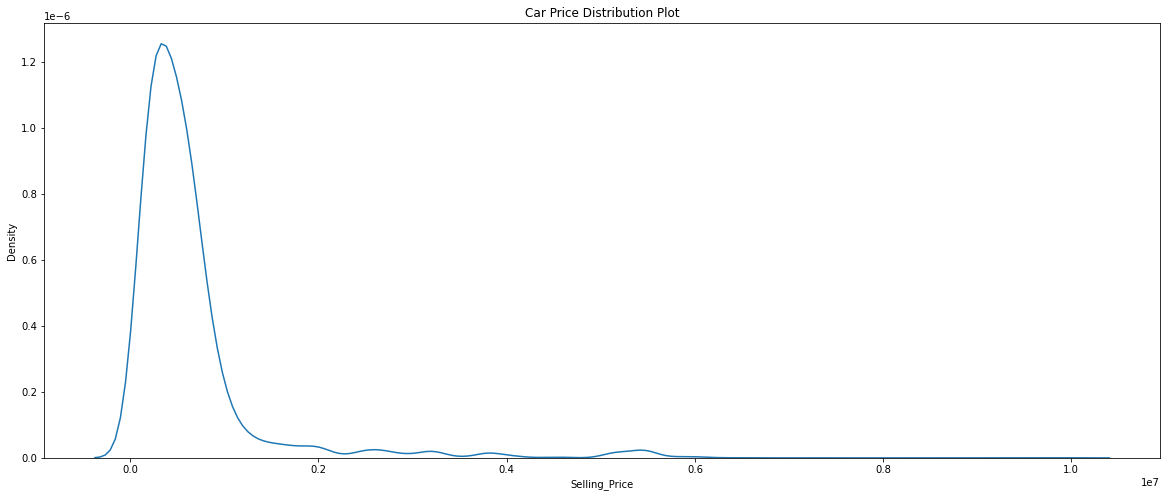

In [25]:
plt.figure(figsize=(20,8))
plt.title('Car Price Distribution Plot')
sns.kdeplot(car_sales.Selling_Price)
plt.show()

In [26]:
car_sales.head()

,Sales_ID,Brand_Name,Car_Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Max_Power,Engine,Seats,City_Name
0,1,Maruti,Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,Manual,First Owner,23.40,74.00,1248.0,5,Mumbai
1,2,Skoda,Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,Manual,Second Owner,21.14,103.52,1498.0,5,Ranchi
2,3,Honda,City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,Manual,Third Owner,17.70,78.00,1497.0,5,Noida
3,4,Hyundai,i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,Manual,First Owner,23.00,90.00,1396.0,5,Dehradun
4,5,Maruti,Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,Manual,First Owner,16.10,88.20,1298.0,5,Chennai


In [83]:
cs=car_sales.drop(['City_Code','State_Code','Postal_Code','Car_Name','Sales_ID'],axis=1)
cs
css=cs.copy()
css

,Brand_Name,Year,Selling_Price,km_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage,Max_Power,Engine,Seats,City_Name
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,74.00,1248.0,5,Mumbai
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,103.52,1498.0,5,Ranchi
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,78.00,1497.0,5,Noida
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,90.00,1396.0,5,Dehradun
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,88.20,1298.0,5,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,82.85,1197.0,5,Indore
7902,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,110.00,1493.0,5,Dehradun
7903,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,73.90,1248.0,5,Kolkata
7904,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,70.00,1396.0,5,Vellore


C:\Users\sgoria\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_Driven'>

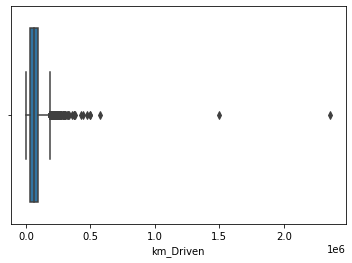

In [84]:

sns.boxplot(cs['km_Driven'])


C:\Users\sgoria\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

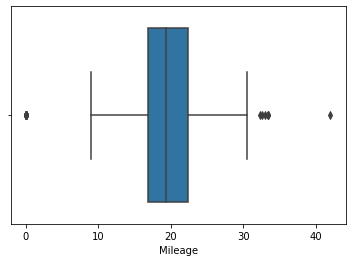

In [85]:
sns.boxplot(cs['Mileage'])

C:\Users\sgoria\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Max_Power'>

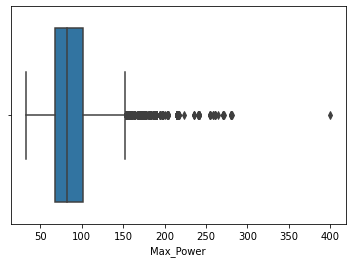

In [86]:

sns.boxplot(cs['Max_Power'])

C:\Users\sgoria\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine'>

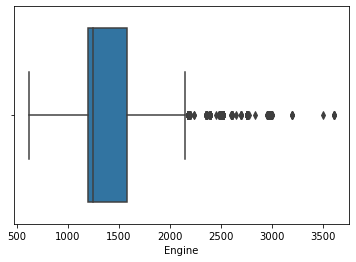

In [87]:
sns.boxplot(cs['Engine'])


In [94]:
Q1 = np.percentile(css['Mileage'], 25, interpolation = 'midpoint')
Q3 = np.percentile(css['Mileage'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upperbound=Q3 + 1.5*IQR
lowerbound=Q1 - 1.5*IQR
css.drop(css[ (css.Mileage > upperbound) | (css.Mileage < lowerbound) ].index , inplace=True)

In [95]:
Q1 = np.percentile(css['Engine'], 25, interpolation = 'midpoint')
Q3 = np.percentile(css['Engine'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upperbound=Q3 + 1.5*IQR
lowerbound=Q1 - 1.5*IQR
css.drop(css[ (css.Engine > upperbound) | (css.Engine < lowerbound) ].index , inplace=True)

In [96]:
Q1 = np.percentile(css['Max_Power'], 25, interpolation = 'midpoint')
Q3 = np.percentile(css['Max_Power'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upperbound=Q3 + 1.5*IQR
lowerbound=Q1 - 1.5*IQR
css.drop(css[ (css.Max_Power > upperbound) | (css.Max_Power < lowerbound) ].index , inplace=True)


In [97]:
Q1 = np.percentile(css['km_Driven'], 25, interpolation = 'midpoint')
Q3 = np.percentile(css['km_Driven'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upperbound=Q3 + 1.5*IQR
lowerbound=Q1 - 1.5*IQR
css.drop(css[(css.km_Driven > upperbound) | (css.km_Driven < lowerbound) ].index , inplace=True)


C:\Users\sgoria\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine'>

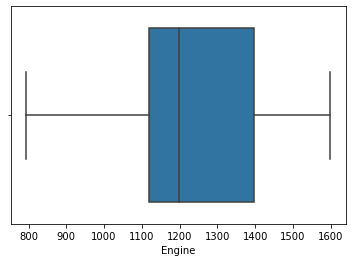

In [98]:
sns.boxplot(css['Engine'])

C:\Users\sgoria\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Max_Power'>

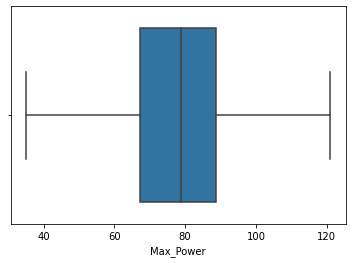

In [99]:
sns.boxplot(css['Max_Power'])

C:\Users\sgoria\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_Driven'>

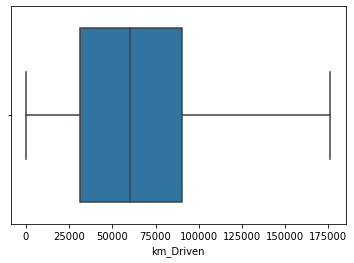

In [100]:
sns.boxplot(css['km_Driven'])

In [101]:
css.to_csv('car_sales_final2.csv', index = False)

## -Plotted Frequency Distribution of Selling Price
## -Right Skewed Data